<a href="https://colab.research.google.com/github/sath-27/Heart-Stroke-Prediction/blob/main/Heart_Stroke_Pred_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, plot_roc_curve, auc,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

2. Loading the data

In [2]:
data = pd.read_csv('stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


3. Data Preprocessing

i. Dealing with missing values

ii. Handling categorical variables 

iii. Dropping unwanted features

iv. Treating outliners 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Unwanted columns = id, ever_married

Gender, Martial status, Work type, Residence type, Smoking status --> to be converted into numerical data

In [5]:
print('The data has', data.shape[0],'rows and ', data.shape[1], 'columns')

# data.shape returns tuple data type
# tuple = data.shape
# len(tuple)
# output = 2

The data has 5110 rows and  12 columns


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
print('mean of bmi is ', data['bmi'].mean() ,'and meadian of bmi is', data['bmi'].median())


mean of bmi is  28.893236911794666 and meadian of bmi is 28.1


In [9]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
#data.isnull().sum()
#data.head()

In [10]:
data.drop(['id','ever_married'] ,axis=1,inplace=True)

In [ ]:
#data.head()

In [11]:
columns = ['gender','work_type','Residence_type','smoking_status']
le = LabelEncoder()

for i in columns:
  print(f"Value counts of {i} column")
  print(data.loc[:, i].value_counts())
  #data[i] = le.fit_transform(data[i])
  print('\n------------------------------------------------\n')



Value counts of gender column
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

------------------------------------------------

Value counts of work_type column
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

------------------------------------------------

Value counts of Residence_type column
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

------------------------------------------------

Value counts of smoking_status column
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

------------------------------------------------



In [ ]:
#data[data['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [12]:
data = data.drop(data[data['gender']== 'Other'].index)

In [13]:
cols = ['gender','work_type','Residence_type','smoking_status']
for j in cols:
  data[j]=le.fit_transform(data[j])

In [14]:
data.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,3,0,174.12,24.000000,2,1


4. Exploratory Data Analysis

In [15]:
data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

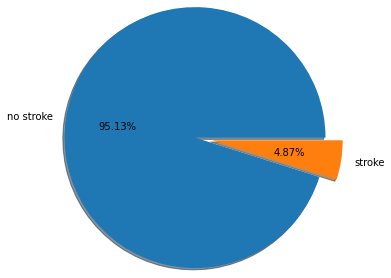

In [16]:
pie_df=pd.DataFrame(data.groupby('stroke')['stroke'].count())
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.2f%%',radius = 1.5,explode = (0, 0.2),shadow=True)
plt.show()

In [ ]:
#Q1 = np.percentile(data['avg_glucose_level'], 25,interpolation = 'midpoint')
 
#Q3 = np.percentile(data['avg_glucose_level'], 75,interpolation = 'midpoint')
#IQR = Q3 - Q1

#len(data[data.avg_glucose_level > Q3+1.5*IQR])/data.shape[0]*/ 

In [ ]:
#sns.boxplot(data['avg_glucose_level'])

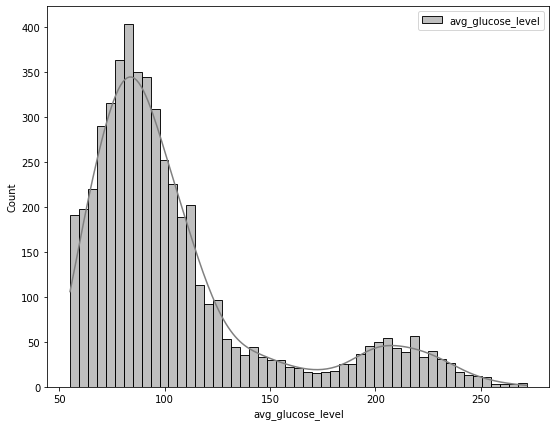

In [17]:
fig = plt.figure(figsize=(9,7))
sns.histplot(data['avg_glucose_level'], color="grey", label="avg_glucose_level", kde= True)
plt.legend()

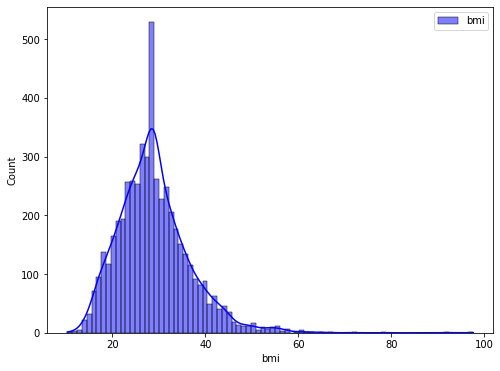

In [18]:
fig = plt.figure(figsize=(8,6))
sns.histplot(data['bmi'], color = "blue", label = 'bmi', kde = True)
plt.legend()

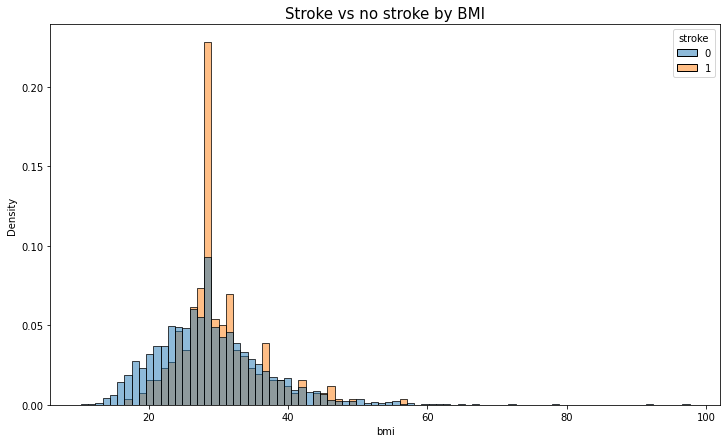

In [19]:
plt.figure(figsize=(12,7))
sns.histplot(data, x="bmi", hue="stroke",stat = 'density',common_norm=False)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

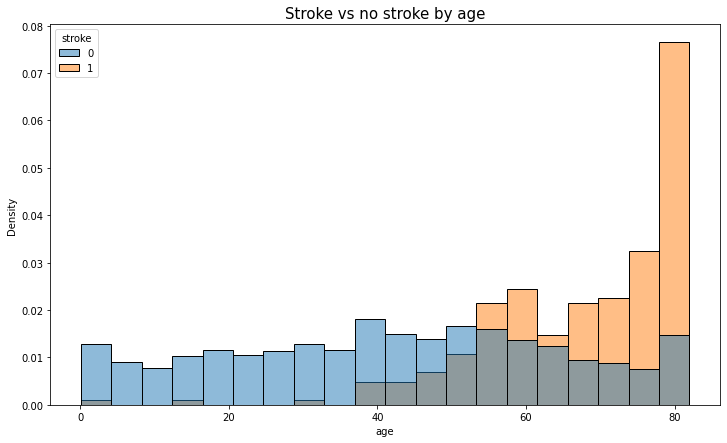

In [20]:
plt.figure(figsize=(12,7))
sns.histplot(data, x="age", hue="stroke",stat = 'density',common_norm=False)
plt.title('Stroke vs no stroke by age', fontsize=15)
plt.show()

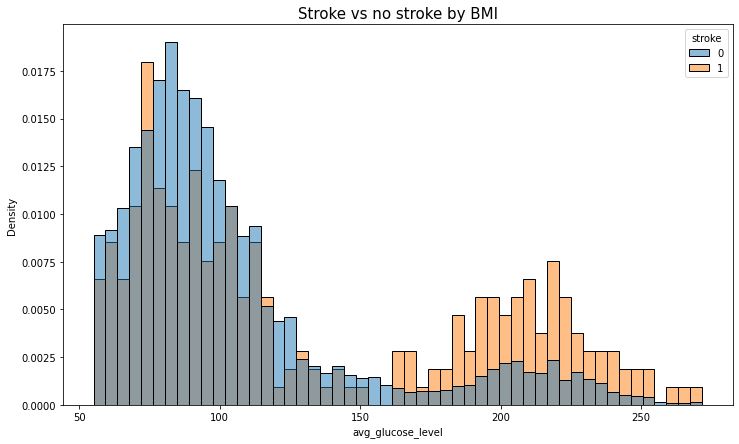

In [21]:
plt.figure(figsize=(12,7))
sns.histplot(data, x="avg_glucose_level", hue="stroke",stat = 'density',common_norm=False)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

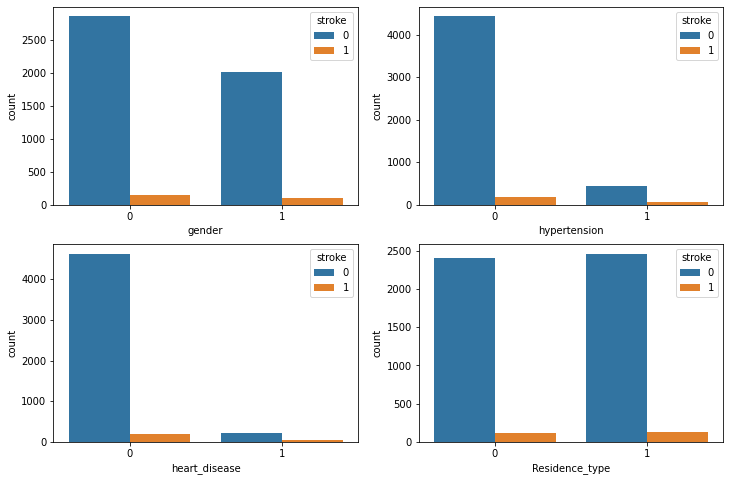

In [22]:
plt.figure(figsize = (12,8))

plt.subplot(221)
sns.countplot(x='gender', hue ='stroke', data=data)
plt.subplot(222)
sns.countplot(x='hypertension', hue ='stroke', data=data)
plt.subplot(223)
sns.countplot(x='heart_disease', hue ='stroke', data=data)
plt.subplot(224)
sns.countplot(x='Residence_type', hue ='stroke', data=data)


Gender:                     

0-> Female

1-> Male

Residence type:

0-> Rural

1-> Urban

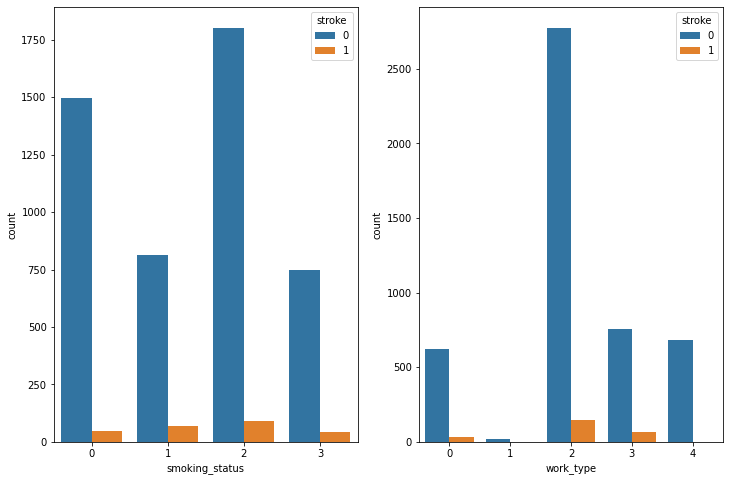

In [23]:
plt.figure(figsize = (12,8))

plt.subplot(121)
sns.countplot(x='smoking_status', hue ='stroke', data=data)
plt.subplot(122)
sns.countplot(x='work_type', hue ='stroke', data=data)

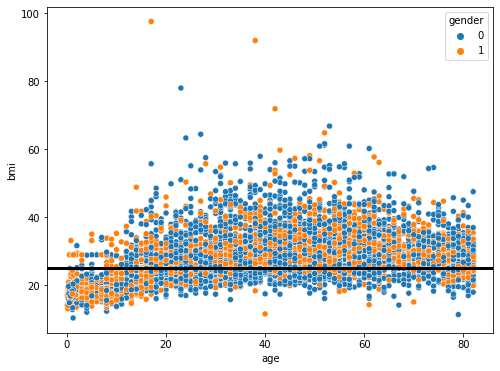

In [24]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=data, x="age", y="bmi", hue='gender')
fig.axhline(y= 25, linewidth=3, color='k')
plt.show()

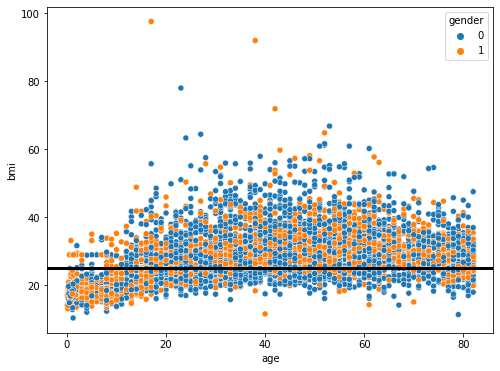

In [25]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=data, x="age", y="bmi", hue='gender')
fig.axhline(y= 25, linewidth=3, color='k')
plt.show()

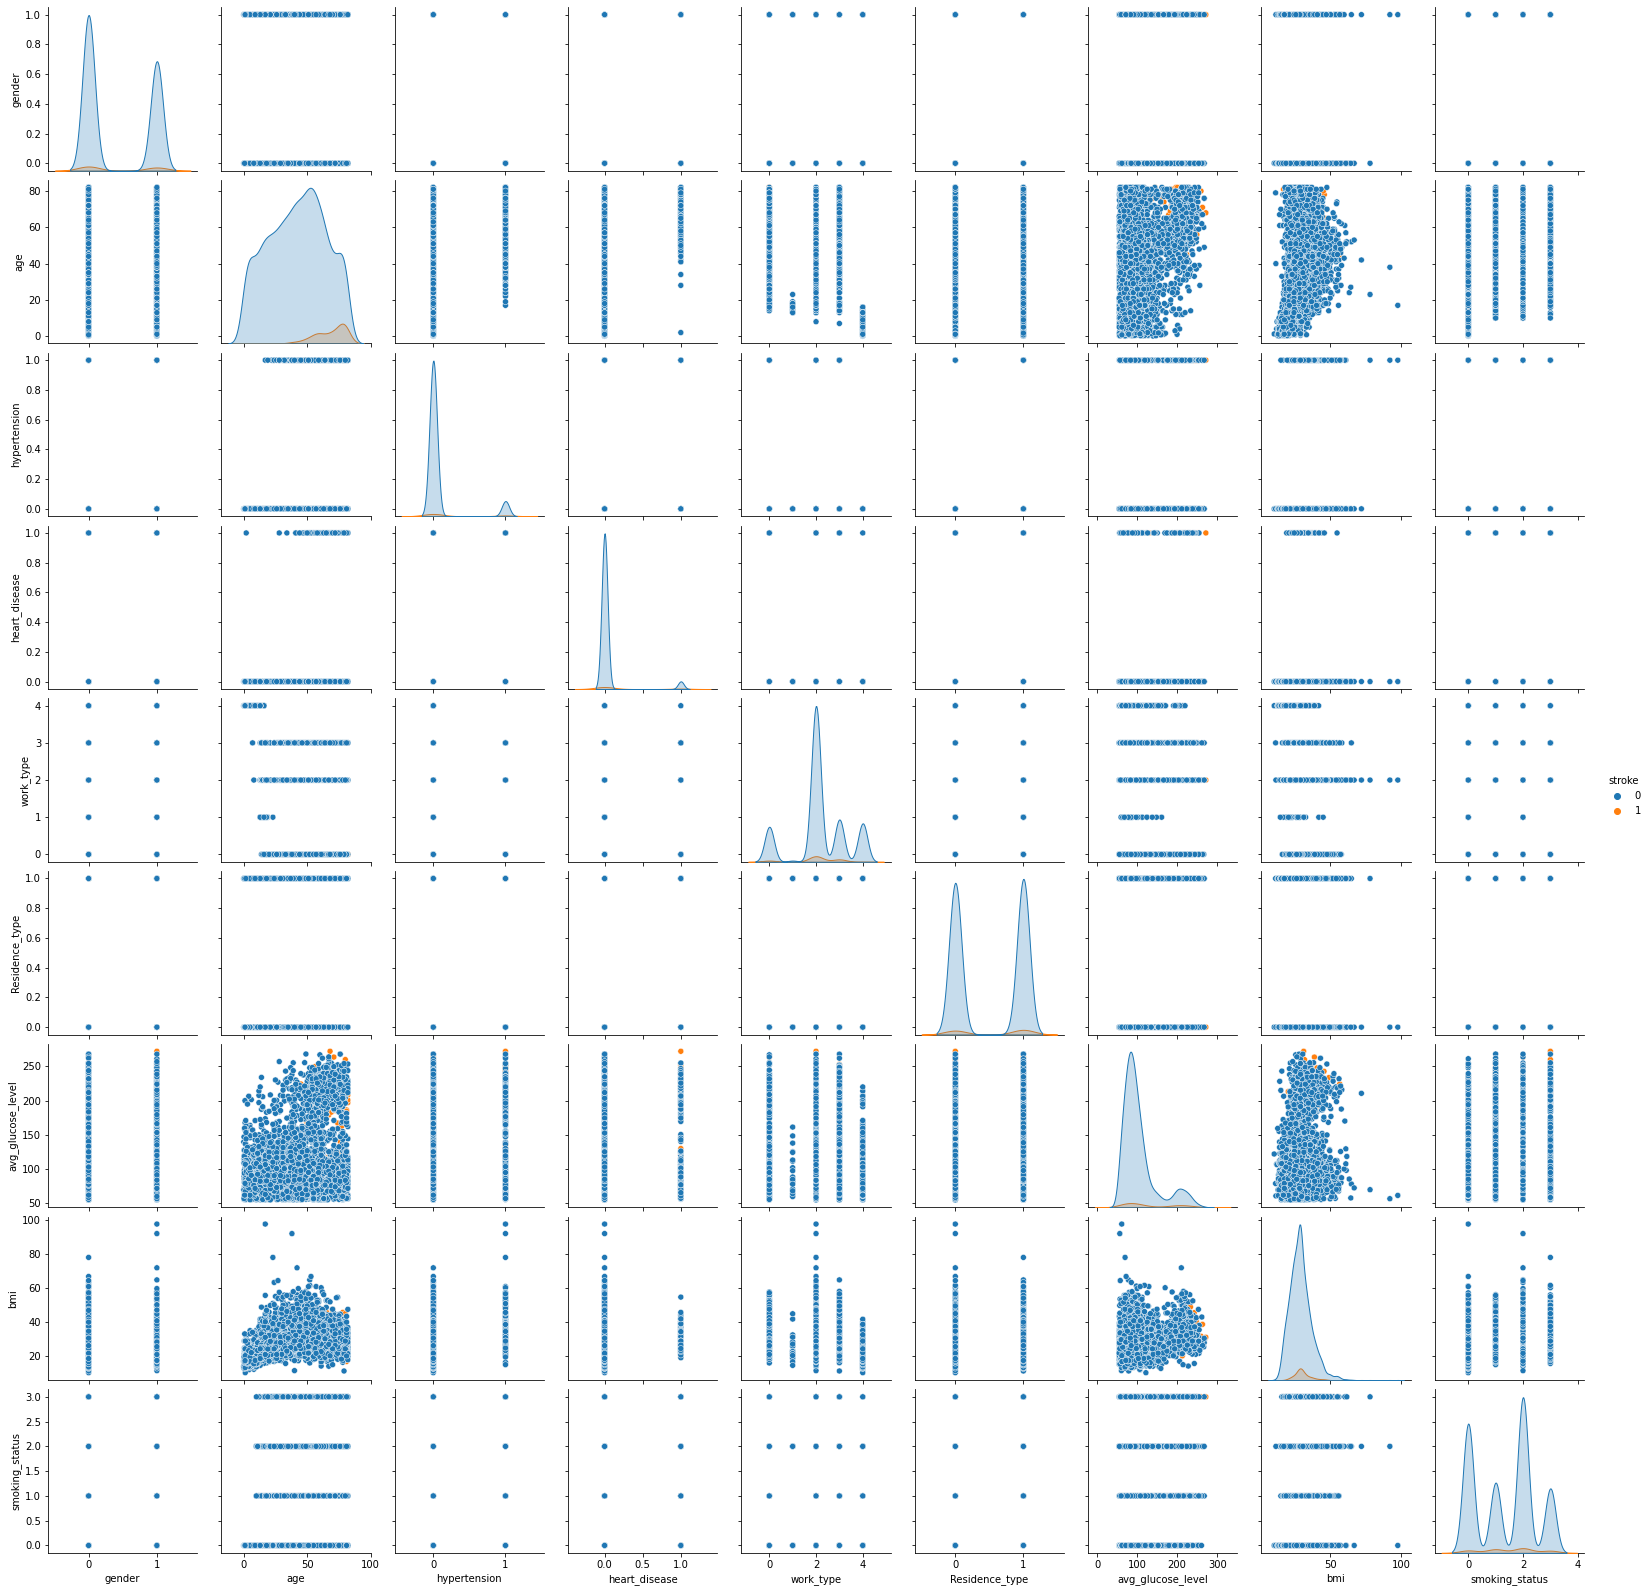

In [26]:
sns.pairplot(data,hue='stroke')

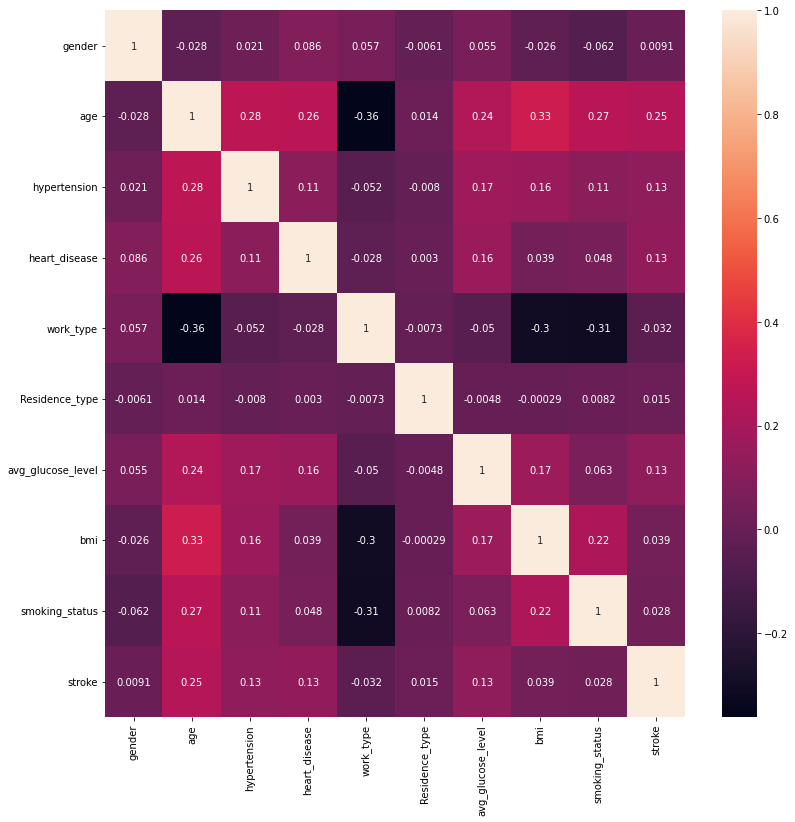

In [33]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),color='red',annot=True)

Conclusions:
1. Data is imbalanced

2. There are outliers in avg_glucose_level data

3. The overweight people(bmi > 25) are likely to suffer stroke.

4. Older people suffer from stroke.

5. Splitting and Scaling the data

In [20]:
x = data.drop('stroke', axis = 1).values
y = data['stroke']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=47)

In [22]:
mms=MinMaxScaler()
x_train = mms.fit_transform(x_train)

Here, the data is impalanced with a mojority of 95% of one class.

When we train on an imbalanced dataset we get 90% accuracy on an imbalanced data (with 90% of the instances in Class-1) is because our models look at the data and cleverly decide that the best thing to do is to always predict “Class-1” and achieve high accuracy.

To Combat Imbalanced Training Data:

1- Try Resampling Your Dataset 

2- Use the right evaluation metrics:
Precision,
Recall,
F1 score,
MCC,
AUC.

In [23]:
oversample = SMOTE()
x_data_balanced, y_data_balanced = oversample.fit_resample(x_train, y_train.ravel())

#y_train.ravel() --> array([0, 0, 0, ..., 1, 1, 1])
#y_train  --> 2 columns dataframe

In [ ]:
#y_data_balanced

array([0, 0, 0, ..., 1, 1, 1])

Implementing the models:
LR,KNN,SVM,DT,RF

Random Forest

In [24]:
rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(x_data_balanced, y_data_balanced)

RandomForestClassifier(criterion='entropy', random_state=0)

In [25]:
y_pred_train_rf = rf.predict(x_data_balanced)
acc_train_rf = accuracy_score(y_data_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

1.0
0.9412915851272016


In [26]:
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

ROC AUC Score: 0.4990575235619109


In [27]:
confusion_matrix(y_test, y_pred_test_rf)

array([[1443,    5],
       [  85,    0]])

Decision Tree

In [28]:
dt =DecisionTreeClassifier(max_depth=12, criterion= 'gini')
dt.fit(x_data_balanced, y_data_balanced)

DecisionTreeClassifier(max_depth=12)

In [29]:
y_pred_train_dt = dt.predict(x_data_balanced)
acc_train_dt = accuracy_score(y_data_balanced, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

0.9523739742086753
0.6046966731898239


In [31]:
dt_perc_score = precision_score(y_test, y_pred_test_dt)
dt_rec_score= recall_score(y_test, y_pred_test_dt)
dt_f1_score = f1_score(y_test, y_pred_test_dt)

print('Precision: %.3f' % dt_perc_score)
print('Recall: %.3f' % dt_rec_score)
print('F-1: %.3f' % dt_f1_score)

Precision: 0.044
Recall: 0.294
F-1: 0.076


In [32]:
y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
dt_roc_auc_score = roc_auc_score(y_test, y_pred_prob_dt)
print('ROC AUC Score:', dt_roc_auc_score)

ROC AUC Score: 0.45852291192720185


In [33]:
confusion_matrix(y_test, y_pred_test_dt)

array([[902, 546],
       [ 60,  25]])

Support Vector Machine

In [34]:
svc = SVC(C=100, gamma=1000 ,probability= True)
svc.fit(x_data_balanced, y_data_balanced)

SVC(C=100, gamma=1000, probability=True)

In [37]:
y_pred_train_svc = svc.predict(x_data_balanced)
acc_train_svc = accuracy_score(y_data_balanced, y_pred_train_svc)

y_pred_test_svc = svc.predict(x_test)
acc_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(acc_train_svc)
print(acc_test_svc)

1.0
0.9445531637312459


In [35]:
y_pred_prob_svc = svc.predict_proba(x_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)
print('ROC AUC Score:', svc_roc_auc_score)

ROC AUC Score: 0.5


In [38]:
confusion_matrix(y_test, y_pred_test_svc)


array([[1448,    0],
       [  85,    0]])

K-NN

In [69]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan', p = 2)
knn.fit(x_data_balanced,y_data_balanced)


KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [70]:
y_pred_train_knn = knn.predict(x_data_balanced)
acc_train_knn = accuracy_score(y_data_balanced, y_pred_train_knn)

y_pred_test_knn = knn.predict(x_test)
acc_test_knn = accuracy_score(y_test, y_pred_test_knn)

print(acc_train_knn)
print(acc_test_knn)

0.9229191090269636
0.49445531637312456


In [71]:
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]
knn_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_knn)
print('ROC AUC Score:', knn_roc_auc_score)

ROC AUC Score: 0.5485172245693858


In [42]:
confusion_matrix(y_test, y_pred_test_knn)

array([[1322,  126],
       [  84,    1]])

Logistic Regression

In [43]:
lr = LogisticRegression(random_state = 0,max_iter=2000)
lr.fit(x_data_balanced,y_data_balanced)

LogisticRegression(max_iter=2000, random_state=0)

In [44]:
y_pred_train_lr = lr.predict(x_data_balanced)
acc_train_lr = accuracy_score(y_data_balanced, y_pred_train_lr)

y_pred_test_lr = lr.predict(x_test)
acc_test_lr = accuracy_score(y_test, y_pred_test_lr)

print(acc_train_lr)
print(acc_test_lr)

0.7895662368112544
0.055446836268754074


In [45]:
y_pred_prob_lr = lr.predict_proba(x_test)[:, 1]
lr_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_lr)
print('ROC AUC Score:', lr_roc_auc_score)

ROC AUC Score: 0.5


In [46]:
confusion_matrix(y_test, y_pred_test_lr)

array([[   0, 1448],
       [   0,   85]])

In [49]:
grid_models = [(SVC(probability=True),[{'C':[10,100], 'gamma':[100,500,1000],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'max_features':[5,6,10,12,14,18,20],'max_depth':[6,10,12,14,18,20] ,'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (KNeighborsClassifier(), [{'n_neighbors': [4,6,8,10,12,14], 'weights': ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan']}])]

In [50]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 5)
    grid.fit(x_data_balanced, y_data_balanced)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

SVC(probability=True):
Best Accuracy : 94.15%
Best Parameters :  {'C': 10, 'gamma': 100, 'kernel': 'rbf', 'random_state': 0}

----------------

DecisionTreeClassifier():
Best Accuracy : 91.38%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 95.47%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 93.61%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

----------------



In [51]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(x_data_balanced, y_data_balanced)

y_pred_train_rf = rf.predict(x_data_balanced)
acc_train_rf = accuracy_score(y_data_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)


y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

1.0
0.9412915851272016
Precision: 0.000
Recall: 0.000
F-measure: 0.000
ROC AUC Score: 0.4990575235619109


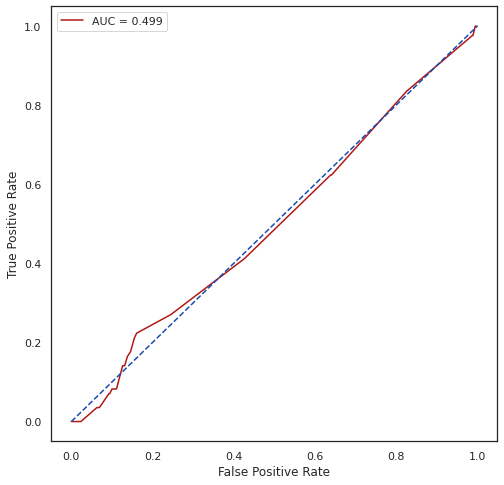

In [52]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [63]:
dt =DecisionTreeClassifier(max_features=5 , max_depth=20,criterion = 'entropy', random_state=0)
dt.fit(x_data_balanced, y_data_balanced)

y_pred_train_dt = dt.predict(x_data_balanced)
acc_train_dt = accuracy_score(y_data_balanced, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)



y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
dt_roc_auc_score = roc_auc_score(y_test, y_pred_prob_dt)
print('ROC AUC Score:', dt_roc_auc_score)

0.9934056271981243
0.943900848010437
ROC AUC Score: 0.49965469613259667


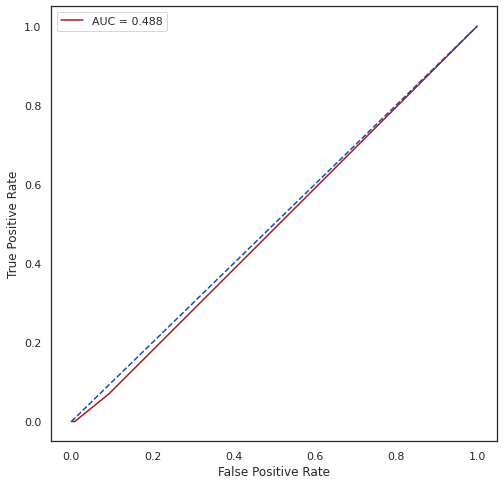

In [55]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [56]:
svc = SVC(C=10, gamma=1000 ,probability= True)
svc.fit(x_data_balanced, y_data_balanced)

y_pred_train_svc = svc.predict(x_data_balanced)
acc_train_svc = accuracy_score(y_data_balanced, y_pred_train_svc)

y_pred_test_svc = svc.predict(x_test)
acc_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(acc_train_svc)
print(acc_test_svc)


y_pred_prob_svc = svc.predict_proba(x_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)
print('ROC AUC Score:', svc_roc_auc_score)

0.9995603751465416
0.9445531637312459
ROC AUC Score: 0.5


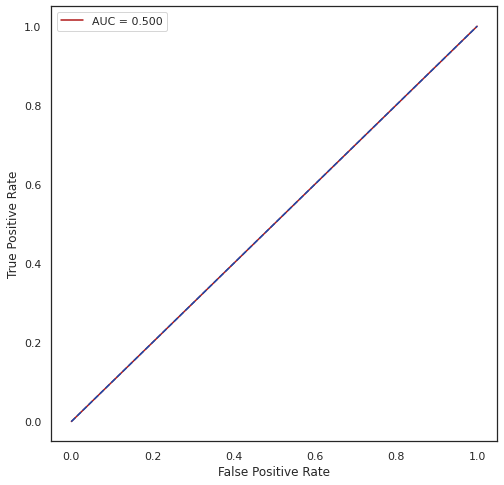

In [57]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [72]:
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'manhattan', p=2)
knn.fit(x_data_balanced,y_data_balanced)

y_pred_train_knn = knn.predict(x_data_balanced)
acc_train_knn = accuracy_score(y_data_balanced, y_pred_train_knn)

y_pred_test_knn = knn.predict(x_test)
acc_test_knn = accuracy_score(y_test, y_pred_test_knn)

print(acc_train_knn)
print(acc_test_knn)

y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]
knn_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_knn)
print('ROC AUC Score:', knn_roc_auc_score)

0.9664419695193435
0.6934116112198304
ROC AUC Score: 0.5296555086122846


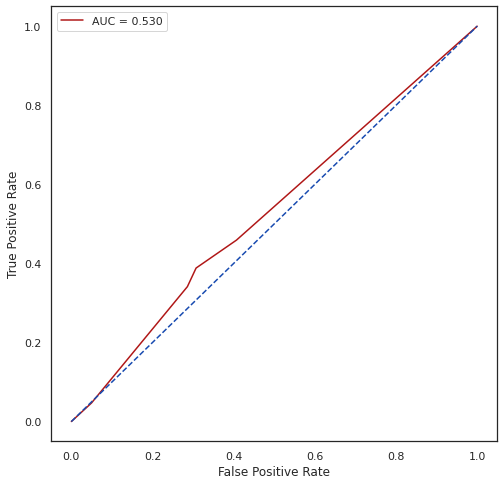

In [73]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_knn)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

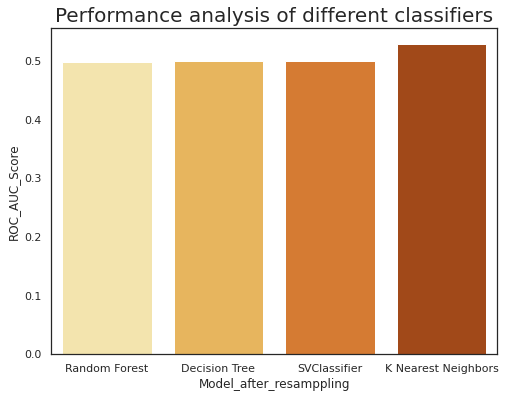

In [74]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['Random Forest','Decision Tree','SVClassifier','K Nearest Neighbors'],
        'Score': [acc_test_rf, acc_test_dt, acc_test_svc,acc_test_knn],
        
        'ROC_AUC_Score': [rf_roc_auc_score, dt_roc_auc_score, svc_roc_auc_score,knn_roc_auc_score]
    }
)

plt.figure(figsize=(8,6))
ax = sns.barplot(x="Model_after_resamppling", y="ROC_AUC_Score", data= Performance, palette="YlOrBr")
#ax.bar_label(ax.containers[0])
plt.title('Performance analysis of different classifiers',fontsize=20)
plt.show()

In [75]:
Performance.sort_values('ROC_AUC_Score')

,Model_after_resamppling,Score,ROC_AUC_Score
0,Random Forest,0.941292,0.499058
1,Decision Tree,0.943901,0.499655
2,SVClassifier,0.944553,0.500000
3,K Nearest Neighbors,0.693412,0.529656


In [76]:
a = pd.DataFrame(x_train)

In [77]:
a.to_excel('Xtrain.xlsx')

In [79]:
b = pd.DataFrame(y_train)

In [80]:
b.to_excel('Ytrain.xlsx')